<a href="https://colab.research.google.com/github/GeorgeKMaina/knn-naive-bayes/blob/main/email_spam_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EMAIL SPAM CLASSIFICATION USING NAIVE BAYES

##1. Defining the question


- Given the data, we are to predict whether an email is spam or not by building a Naive Bayes Model.

## 2. Metric for success

- Our analysis will be considered successful if we are able to develop a Naive Bayes model that can accurately predict whether or not an email is spam.

## 3. Understanding the context

- The spam dataset's final column indicates whether the e-mail was considered spam (1) or not (0). The majority of the attributes indicate whether a specific word or character appeared frequently in the e-mail.

## 4. Experimental design

- Data Preparation
- Exploratory Data Analysis
- Data Preprocessing
- Building our models: Gaussian,Multinomial
- Challenging the solutions
- Conclusion and Recommendations

# Importing libraries and the data we will use

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# Set global parameters
%matplotlib inline
sns.set()
plt.rcParams['figure.figsize'] = (10.0, 8.0)
warnings.filterwarnings('ignore')

In [2]:
# Loading our datasets
with open('/content/spambase.names') as file:
  names = file.read()
  print(names)

| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
|
| 48 continuous real [0,100] attributes of type word_freq_WORD 
| = percentage of words in the e-mail that match WORD,
| i.e. 100 * (number of times the WORD appears in the e-mail) / 
| total number of words in e-mail.  A "word" in this case is any 
| string of alphanumeric characters bounded by non-alphanumeric 
| characters or end-of-string.
|
| 6 continuous real [0,100] attributes of type char_freq_CHAR
| = percentage of characters in the e-mail that match CHAR,
| i.e. 100 * (number of CHAR occurences) / total characters in e-mail
|
| 1 continuous real [1,...] attribute of type capital_run_length_average
| = average length of uninterrupted sequences of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_longest
| = length of longest uninterrupted sequence of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_total
| = sum of length of uninterrupted sequences of

In [3]:
# Lets get our column names and enter them in a list from the data above
columns = ['word_freq_make',
          'word_freq_address',      
          'word_freq_all',          
          'word_freq_3d',          
          'word_freq_our',          
          'word_freq_over',         
          'word_freq_remove',       
          'word_freq_internet',     
          'word_freq_order',        
          'word_freq_mail',         
          'word_freq_receive',      
          'word_freq_will',         
          'word_freq_people',       
          'word_freq_report',       
          'word_freq_addresses',    
          'word_freq_free',         
          'word_freq_business',     
          'word_freq_email',        
          'word_freq_you',          
          'word_freq_credit',       
          'word_freq_your',         
          'word_freq_font',         
          'word_freq_000',          
          'word_freq_money',        
          'word_freq_hp',           
          'word_freq_hpl',          
          'word_freq_george',       
          'word_freq_650',          
          'word_freq_lab',          
          'word_freq_labs',         
          'word_freq_telnet',       
          'word_freq_857',          
          'word_freq_data',         
          'word_freq_415',          
          'word_freq_85',           
          'word_freq_technology',   
          'word_freq_1999',         
          'word_freq_parts',        
          'word_freq_pm',           
          'word_freq_direct',       
          'word_freq_cs',           
          'word_freq_meeting',      
          'word_freq_original',     
          'word_freq_project',      
          'word_freq_re',           
          'word_freq_edu',          
          'word_freq_table',        
          'word_freq_conference',   
          'char_freq_;',            
          'char_freq_(',            
          'char_freq_[',            
          'char_freq_!',            
          'char_freq_$',            
          'char_freq_#',            
          'capital_run_length_average', 
          'capital_run_length_longest', 
          'capital_run_length_total',
          'spam']

In [4]:
email = pd.read_csv('/content/spambase.data', names=columns)

In [5]:
# Preview the top of our data
email.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [6]:
# preview the bottom of our data
email.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [7]:
# checking the shape of our data
email.shape

(4601, 58)

In [8]:
# checking the dtypes of our columns
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

# Data Cleaning

In [9]:
# checking for null values
email.isnull().sum().sum()

0

In [10]:
# Cheking our column names
#
email.columns

#all names are in lower case and have been separated by an underscore('_')

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [11]:
# check for duplicates
email.duplicated().sum()

391

In [12]:
# Dropping our duplicates
email.drop_duplicates(inplace=True)

#EDA

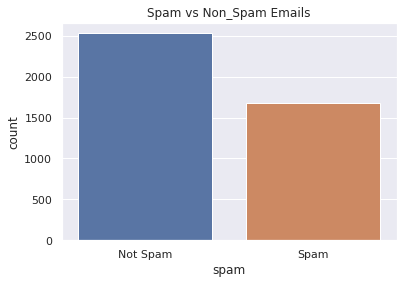

In [13]:
# Plotting the target variable 

sns.countplot(email.spam)
plt.title('Spam vs Non_Spam Emails')
plt.xticks([0,1],['Not Spam', 'Spam'])
plt.show()

In [14]:
# check proportion of target variable in %
email.spam.value_counts(normalize=True)*100

0    60.118765
1    39.881235
Name: spam, dtype: float64

60.1% of our emails are normal(not spam) and 39.9% are spam emails.

#Modelling

## Baseline model

In [15]:
# Defining our predictor and target variables
#
X = email.drop(['spam'], axis = 1)
y = email['spam']

# Spliting our dataset
#
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0, test_size = 0.2)
# Scaling predictor variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Fitting the data
regressor = LogisticRegression()
regressor.fit(X_train, y_train)

LogisticRegression()

In [16]:
# Making the prediction. 
#
y_pred = regressor.predict(X_test)

In [17]:
# Getting the score of the baseline model. 
#
cm = confusion_matrix(y_test, y_pred)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('The confusuion matrix is: ', "\n",cm)
print ('The accuracy score: ', accuracy_score(y_test, y_pred))

Root Mean Squared Error: 0.3043625791263548
Mean Squared Error: 0.09263657957244656
The confusuion matrix is:  
 [[465  30]
 [ 48 299]]
The accuracy score:  0.9073634204275535


- our baseline model has an RMSE of 0.31 which is relatively low
- The accuracy of our baseline model is 91%

## Naive bayes model

Since our data is continous, we will use the gaussian naive bayes model. The assumption is that the data is normally distributed

In [18]:
# Fitting our model
#
clf = GaussianNB()  
model = clf.fit(X_train, y_train)

In [19]:
# Predicting our test predictors
predicted = model.predict(X_test)
print ('The accuracy score: ', accuracy_score(y_test, predicted))

The accuracy score:  0.8171021377672208


In [20]:
# Let's see the parameters to be hypertuned
GaussianNB()

GaussianNB()

In [21]:
# performing gridsearch 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import RepeatedStratifiedKFold

np.random.seed(999)

nb_classifier = GaussianNB()

params_ = {'var_smoothing': np.logspace(0,-9, num=100)}

cv = RepeatedStratifiedKFold(n_splits=15, 
                                    n_repeats=3, 
                                    random_state=0)

gs_ = GridSearchCV(estimator=nb_classifier, 
                     param_grid=params_, 
                     cv=cv,
                     verbose=1, 
                     scoring='accuracy')

gs_.fit(X_train, y_train)

gs_.best_params_
print('best parameters:',gs_.best_params_)
print('best score:',gs_.best_score_)
print('best estimator:',gs_.best_estimator_)

Fitting 45 folds for each of 100 candidates, totalling 4500 fits
best parameters: {'var_smoothing': 4.328761281083062e-05}
best score: 0.8211644620811288
best estimator: GaussianNB(var_smoothing=4.328761281083062e-05)


In [22]:
# Let's apply the best params
# Splitting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=0)

# Training our model
from sklearn.naive_bayes import GaussianNB 
clf = GaussianNB(priors=None,var_smoothing= 4.328761281083062e-05)
model = clf.fit(X_train, y_train) 

# Predicting our test predictors
y_pred = model.predict(X_test)

# evaluating the model
from sklearn.metrics import accuracy_score
import scipy.stats as stats
print("Naive bayes model accuracy(70-30 split) is", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Naive bayes model accuracy(70-30 split) is 0.6611243072050673
[[715  22]
 [406 120]]
              precision    recall  f1-score   support

           0       0.64      0.97      0.77       737
           1       0.85      0.23      0.36       526

    accuracy                           0.66      1263
   macro avg       0.74      0.60      0.56      1263
weighted avg       0.72      0.66      0.60      1263



- The model's accuracy reduced from an accuracy score of 81.7% to 66.9%.

## Performing LDA

-LDA performs dimensionality reduction by choosing the variables that can explain our taget variable the best

In [23]:
# splitting our train and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=0)

# Scaling our features.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Training our model
from sklearn.naive_bayes import GaussianNB 
clf = GaussianNB()
model = clf.fit(X_train, y_train) 

# Predicting 
y_pred_lda = model.predict(X_test)

# evaluating the model
from sklearn.metrics import accuracy_score
import scipy.stats as stats
print("The model accuracy is", accuracy_score(y_test,y_pred_lda))
print(confusion_matrix(y_test, y_pred_lda))
print(classification_report(y_test, y_pred_lda))

The model accuracy is 0.9073634204275535
[[693  44]
 [ 73 453]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       737
           1       0.91      0.86      0.89       526

    accuracy                           0.91      1263
   macro avg       0.91      0.90      0.90      1263
weighted avg       0.91      0.91      0.91      1263



- After performing LDA,the accuracy score yielded was 90.73% which is the best performance overall.

In [24]:
# Getting the LDA coeficients
factors = pd.DataFrame (index = X.columns.values, data = lda.coef_[0].T)
factors.sort_values(0, ascending = False).head(10)

,0
word_freq_remove,0.798490
char_freq_!,0.731173
word_freq_your,0.586018
word_freq_our,0.584870
word_freq_free,0.573864
word_freq_000,0.551253
char_freq_$,0.540619
word_freq_font,0.463493
capital_run_length_total,0.433138
word_freq_money,0.411027


## Challenging the solution

In [25]:
# Splitting the data into training and test sets,
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling our features.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training our model 
svm = SVC(C=0.1, gamma=0.001, kernel = 'linear')
model = svm.fit(X_train, y_train) 

# Predicting 
y_pred_svm = model.predict(X_test)

# evaluating the model
from sklearn.metrics import accuracy_score
import scipy.stats as stats
print("The model accuracy is", accuracy_score(y_test,y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

The model accuracy is 0.9144893111638955
[[698  42]
 [ 66 457]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       740
           1       0.92      0.87      0.89       523

    accuracy                           0.91      1263
   macro avg       0.91      0.91      0.91      1263
weighted avg       0.91      0.91      0.91      1263



- The svm algorithim produce an accuracy score of 91.44% which is negligibly higher than that of the naive bayes algorithim with LDA (90.7%).

## Conclusion

- The naive bayes algorithim with LDA is sufficient as it gives a score close to that of svm